In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('training_data/250820/test_combined.csv')

In [3]:
dataset.dtypes

Stack Voltage(V)       float64
Stack Current(A)       float64
Stack Temperatur(C)      int64
Istwert Durchfluss     float64
dtype: object

In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values

In [5]:
X

array([[ 0., 27.,  0.],
       [ 0., 27.,  0.],
       [ 0., 27.,  0.],
       ...,
       [ 0., 30.,  0.],
       [ 0., 30.,  0.],
       [ 0., 30.,  0.]])

In [6]:
y

array([19.769231, 19.769231, 19.769231, ..., 18.923077, 18.923077,
       19.      ])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [8]:
X_train

array([[ 0.        , 29.        ,  0.        ],
       [ 1.3       , 28.        ,  0.        ],
       [ 1.2       , 27.        ,  0.06672111],
       ...,
       [ 0.5       , 33.        ,  0.        ],
       [ 0.4       , 34.        ,  0.1014856 ],
       [ 0.4       , 32.        ,  0.        ]])

In [9]:
X_test

array([[ 0.3       , 33.        ,  0.        ],
       [ 3.        , 34.        ,  0.        ],
       [ 1.2       , 28.        ,  1.618058  ],
       ...,
       [ 7.3       , 38.        ,  0.        ],
       [ 1.4       , 28.        ,  0.09009045],
       [ 0.5       , 32.        ,  0.        ]])

In [10]:
y_train



array([19.384615, 14.846154, 14.846154, ..., 16.615385, 16.846154,
       16.615385])

In [11]:
y_test

array([16.846154, 14.384615, 14.846154, ..., 12.846154, 14.846154,
       16.615385])

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
yscaler = StandardScaler()
y_train = yscaler.fit_transform(y_train.reshape(-1, 1))
y_test= yscaler.transform(y_test.reshape(-1, 1))

In [13]:
X_train

array([[-0.67379645, -0.67435386, -0.34355359],
       [ 0.08655688, -0.97688781, -0.34355359],
       [ 0.02806817, -1.27942177, -0.18257915],
       ...,
       [-0.38135286,  0.53578197, -0.34355359],
       [-0.43984158,  0.83831593, -0.09870473],
       [-0.43984158,  0.23324802, -0.34355359]])

In [14]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential(
    [
        layers.Dense(3, activation="sigmoid", name="layer1"),
        layers.Dense(3, activation="sigmoid", name="layer2"),
        layers.Dense(3, activation="sigmoid", name="layer3"),
        layers.Dense(1, name="layer4"),
    ]
)
model.compile(optimizer="adam", loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\steph\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

In [15]:
model.fit(X_train, y_train, batch_size=32, epochs=1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/1000
30980/30980 [==============================] - 1s 28us/sample - loss: -1.1671 - acc: 0.0000e+00
Epoch 2/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -0.4354 - acc: 0.0000e+00
Epoch 3/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1932e-08 - acc: 0.0000e+00
Epoch 4/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5472e-08 - acc: 0.0000e+00
Epoch 5/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5657e-08 - acc: 0.0000e+00
Epoch 6/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7788e-08 - acc: 0.0000e+00
Epoch 7/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4625e-08 - acc: 0.0000e+00
Epoch 8/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.6806e-08 - acc: 0.0000e+00
Epoch 9/10

Epoch 70/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5811e-08 - acc: 0.0000e+00
Epoch 71/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.1675e-08 - acc: 0.0000e+00
Epoch 72/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3763e-08 - acc: 0.0000e+00
Epoch 73/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3409e-08 - acc: 0.0000e+00
Epoch 74/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8781e-08 - acc: 0.0000e+00
Epoch 75/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.7276e-08 - acc: 0.0000e+00
Epoch 76/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.6811e-08 - acc: 0.0000e+00
Epoch 77/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8073e-08 - acc: 0.0000e+00
Epoch 78/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.4

30980/30980 [==============================] - 1s 23us/sample - loss: -5.2270e-08 - acc: 0.0000e+00
Epoch 142/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.2783e-08 - acc: 0.0000e+00
Epoch 143/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7965e-08 - acc: 0.0000e+00
Epoch 144/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5564e-08 - acc: 0.0000e+00
Epoch 145/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.4399e-08 - acc: 0.0000e+00
Epoch 146/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.1690e-08 - acc: 0.0000e+00
Epoch 147/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.8073e-08 - acc: 0.0000e+00
Epoch 148/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3132e-08 - acc: 0.0000e+00
Epoch 149/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.2475e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -5.8543e-08 - acc: 0.0000e+00
Epoch 213/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3733e-08 - acc: 0.0000e+00
Epoch 214/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.7930e-08 - acc: 0.0000e+00
Epoch 215/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.4805e-08 - acc: 0.0000e+00
Epoch 216/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.5292e-08 - acc: 0.0000e+00
Epoch 217/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.9284e-08 - acc: 0.0000e+00
Epoch 218/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3009e-08 - acc: 0.0000e+00
Epoch 219/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.9192e-08 - acc: 0.0000e+00
Epoch 220/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.1909e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -5.8381e-08 - acc: 0.0000e+00
Epoch 284/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3533e-08 - acc: 0.0000e+00
Epoch 285/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.7427e-08 - acc: 0.0000e+00
Epoch 286/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5826e-08 - acc: 0.0000e+00
Epoch 287/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.1793e-08 - acc: 0.0000e+00
Epoch 288/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.0978e-08 - acc: 0.0000e+00
Epoch 289/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.6026e-08 - acc: 0.0000e+00
Epoch 290/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3717e-08 - acc: 0.0000e+00
Epoch 291/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5895e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -5.2086e-08 - acc: 0.0000e+00
Epoch 355/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.9074e-08 - acc: 0.0000e+00
Epoch 356/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7034e-08 - acc: 0.0000e+00
Epoch 357/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.6303e-08 - acc: 0.0000e+00
Epoch 358/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.8715e-08 - acc: 0.0000e+00
Epoch 359/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.5167e-08 - acc: 0.0000e+00
Epoch 360/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.8700e-08 - acc: 0.0000e+00
Epoch 361/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.9143e-08 - acc: 0.0000e+00
Epoch 362/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5410e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -5.2394e-08 - acc: 0.0000e+00
Epoch 426/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.3268e-08 - acc: 0.0000e+00
Epoch 427/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.4859e-08 - acc: 0.0000e+00
Epoch 428/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.2471e-08 - acc: 0.0000e+00
Epoch 429/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.2978e-08 - acc: 0.0000e+00
Epoch 430/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.3922e-08 - acc: 0.0000e+00
Epoch 431/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.8981e-08 - acc: 0.0000e+00
Epoch 432/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.6519e-08 - acc: 0.0000e+00
Epoch 433/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.4333e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -5.0639e-08 - acc: 0.0000e+00
Epoch 497/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3117e-08 - acc: 0.0000e+00
Epoch 498/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.8643e-08 - acc: 0.0000e+00
Epoch 499/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.9192e-08 - acc: 0.0000e+00
Epoch 500/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.4764e-08 - acc: 0.0000e+00
Epoch 501/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5349e-08 - acc: 0.0000e+00
Epoch 502/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.2367e-08 - acc: 0.0000e+00
Epoch 503/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.1105e-08 - acc: 0.0000e+00
Epoch 504/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.0362e-0

30980/30980 [==============================] - 1s 25us/sample - loss: -6.4999e-08 - acc: 0.0000e+00
Epoch 568/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.7545e-08 - acc: 0.0000e+00
Epoch 569/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.8350e-08 - acc: 0.0000e+00
Epoch 570/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8592e-08 - acc: 0.0000e+00
Epoch 571/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5564e-08 - acc: 0.0000e+00
Epoch 572/1000
30980/30980 [==============================] - 1s 27us/sample - loss: -5.7704e-08 - acc: 0.0000e+00
Epoch 573/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8289e-08 - acc: 0.0000e+00
Epoch 574/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.7130e-08 - acc: 0.0000e+00
Epoch 575/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.1747e-0

30980/30980 [==============================] - 1s 25us/sample - loss: -5.2347e-08 - acc: 0.0000e+00
Epoch 639/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -5.4025e-08 - acc: 0.0000e+00
Epoch 640/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6765e-08 - acc: 0.0000e+00
Epoch 641/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3763e-08 - acc: 0.0000e+00
Epoch 642/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4179e-08 - acc: 0.0000e+00
Epoch 643/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.7807e-08 - acc: 0.0000e+00
Epoch 644/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2117e-08 - acc: 0.0000e+00
Epoch 645/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.4425e-08 - acc: 0.0000e+00
Epoch 646/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -6.1844e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -6.3075e-08 - acc: 0.0000e+00
Epoch 710/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.6345e-08 - acc: 0.0000e+00
Epoch 711/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -6.4799e-08 - acc: 0.0000e+00
Epoch 712/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -5.7996e-08 - acc: 0.0000e+00
Epoch 713/1000
30980/30980 [==============================] - 1s 26us/sample - loss: -5.5410e-08 - acc: 0.0000e+00
Epoch 714/1000
30980/30980 [==============================] - 1s 26us/sample - loss: -5.9905e-08 - acc: 0.0000e+00
Epoch 715/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7658e-08 - acc: 0.0000e+00
Epoch 716/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6380e-08 - acc: 0.0000e+00
Epoch 717/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.0362e-0

30980/30980 [==============================] - 1s 23us/sample - loss: -5.7396e-08 - acc: 0.0000e+00loss: -
Epoch 781/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -7.1079e-08 - acc: 0.0000e+00
Epoch 782/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.2801e-08 - acc: 0.0000e+00
Epoch 783/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.7073e-08 - acc: 0.0000e+00
Epoch 784/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8166e-08 - acc: 0.0000e+00
Epoch 785/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.3656e-08 - acc: 0.0000e+00
Epoch 786/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.6419e-08 - acc: 0.0000e+00
Epoch 787/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -4.7299e-08 - acc: 0.0000e+00
Epoch 788/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.

30980/30980 [==============================] - 1s 25us/sample - loss: -6.5861e-08 - acc: 0.0000e+00
Epoch 852/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.7519e-08 - acc: 0.0000e+00
Epoch 853/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.2029e-08 - acc: 0.0000e+00
Epoch 854/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2840e-08 - acc: 0.0000e+00
Epoch 855/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.9181e-08 - acc: 0.0000e+00
Epoch 856/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.5872e-08 - acc: 0.0000e+00
Epoch 857/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.7154e-08 - acc: 0.0000e+00
Epoch 858/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -6.1898e-08 - acc: 0.0000e+00
Epoch 859/1000
30980/30980 [==============================] - 1s 23us/sample - loss: -5.1839e-0

30980/30980 [==============================] - 1s 25us/sample - loss: -6.1059e-08 - acc: 0.0000e+00
Epoch 923/1000
30980/30980 [==============================] - 1s 25us/sample - loss: -6.3553e-08 - acc: 0.0000e+00
Epoch 924/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.5333e-08 - acc: 0.0000e+00
Epoch 925/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3009e-08 - acc: 0.0000e+00
Epoch 926/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.0736e-08 - acc: 0.0000e+00
Epoch 927/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.7724e-08 - acc: 0.0000e+00
Epoch 928/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.8273e-08 - acc: 0.0000e+00
Epoch 929/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.2194e-08 - acc: 0.0000e+00
Epoch 930/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6788e-0

30980/30980 [==============================] - 1s 24us/sample - loss: -6.1128e-08 - acc: 0.0000e+00
Epoch 994/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.2620e-08 - acc: 0.0000e+00
Epoch 995/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.3864e-08 - acc: 0.0000e+00
Epoch 996/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6072e-08 - acc: 0.0000e+00
Epoch 997/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.6334e-08 - acc: 0.0000e+00
Epoch 998/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -6.3214e-08 - acc: 0.0000e+00
Epoch 999/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -5.7534e-08 - acc: 0.0000e+00
Epoch 1000/1000
30980/30980 [==============================] - 1s 24us/sample - loss: -4.8192e-08 - acc: 0.0000e+00


In [16]:
y_pred = model.predict(X_test)

In [17]:
from sklearn.metrics import mean_squared_error
me = mean_squared_error(y_test, y_pred)
print(me)

1.0094502625396564


Text(0, 0.5, 'actual')

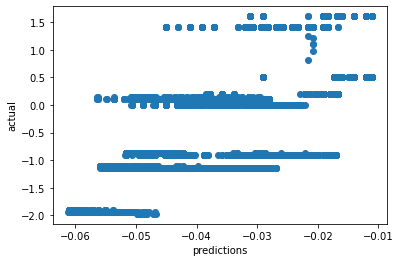

In [18]:
plt.scatter(y_pred, y_test)
plt.xlabel("predictions")
plt.ylabel("actual")

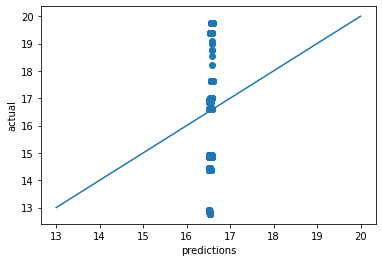

In [19]:
plt.scatter(yscaler.inverse_transform(y_pred),yscaler.inverse_transform(y_test))
plt.xlabel("predictions")
plt.ylabel("actual")
plt.plot([13, 20], [13, 20])


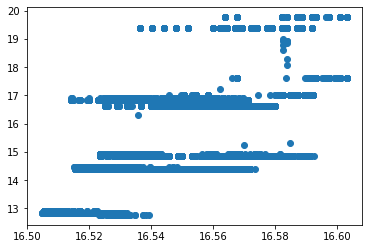

In [21]:
plt.scatter(yscaler.inverse_transform(model.predict(X_train)), yscaler.inverse_transform(y_train))